In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#! /usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt

class hhNeuron:
    '''Modified from http://neurdon.wpengine.com/2011/01/26/neural-modeling-with-python-part-2/'''

    def __init__(self):

        ## Functions
        # K channel
        self.alpha_n = np.vectorize(lambda v: 0.01*(-v + 10)/(np.exp((-v + 10)/10) - 1) if v != 10 else 0.1)
        self.beta_n  = lambda v: 0.125*np.exp(-v/80)
        self.n_inf   = lambda v: self.alpha_n(v)/(self.alpha_n(v) + self.beta_n(v))
        
        # Na channel (activating)
        self.alpha_m = np.vectorize(lambda v: 0.1*(-v + 25)/(np.exp((-v + 25)/10) - 1) if v != 25 else 1)
        self.beta_m  = lambda v: 4*np.exp(-v/18)
        self.m_inf   = lambda v: self.alpha_m(v)/(self.alpha_m(v) + self.beta_m(v))
        
        # Na channel (inactivating)
        self.alpha_h = lambda v: 0.07*np.exp(-v/20)
        self.beta_h  = lambda v: 1/(np.exp((-v + 30)/10) + 1)
        self.h_inf   = lambda v: self.alpha_h(v)/(self.alpha_h(v) + self.beta_h(v))
        
        ## setup parameters and state variables
        self.T     = 55    # ms
        self.dt    = 0.025 # ms
        self.time  = np.arange(0,self.T + self.dt, self.dt)
        
        ## HH Parameters
        self.V_rest  = 0      # mV
        self.Cm      = 1      # uF/cm2
        self.gbar_Na = 120    # mS/cm2
        self.gbar_K  = 36     # mS/cm2
        self.gbar_l  = 0.3    # mS/cm2
        self.E_Na    = 115    # mV
        self.E_K     = -12    # mV
        self.E_l     = 10.613 # mV
        
        self.Vm      = np.zeros(len(self.time)) # mV
        self.Vm[0]   = self.V_rest
        self.m       = self.m_inf(self.V_rest)      
        self.h       = self.h_inf(self.V_rest)
        self.n       = self.n_inf(self.V_rest)
    
    # Stimulus protocol - here a square wave of 10us/cm2 from 5 to 10 ms
    def stim(self,time,on=5,off=30):
        ## Stimulus
        I = np.zeros(len(time))
        for i, t in enumerate(time):
            if on <= t <= off: I[i] = 10 # uA/cm2
        return I
    
    def sim(self):
        '''Simulate under the stimulus protocol'''
        time=self.time
        I=self.stim(self.time)
        for i in range(1,len(time)):
            self.g_Na = self.gbar_Na*(self.m**3)*self.h
            self.g_K  = self.gbar_K*(self.n**4)
            self.g_l  = self.gbar_l
            
            self.m += (self.alpha_m(self.Vm[i-1])*(1 - self.m) - self.beta_m(self.Vm[i-1])*self.m) * self.dt
            self.h += (self.alpha_h(self.Vm[i-1])*(1 - self.h) - self.beta_h(self.Vm[i-1])*self.h) * self.dt
            self.n += (self.alpha_n(self.Vm[i-1])*(1 - self.n) - self.beta_n(self.Vm[i-1])*self.n) * self.dt
            
            self.Vm[i] = self.Vm[i-1] + (I[i-1] - self.g_Na*(self.Vm[i-1] - self.E_Na) - self.g_K*(self.Vm[i-1] - self.E_K) - self.g_l*(self.Vm[i-1] - self.E_l)) / self.Cm * self.dt

In [27]:
# Run the simulation

hh = hhNeuron()
hh.sim()

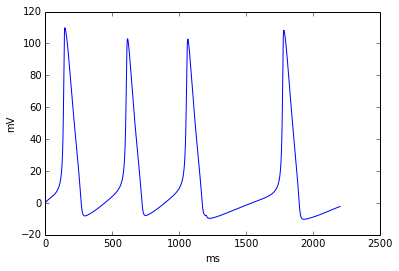

In [28]:
# Plot the output

plt.plot(hh.Vm)
plt.xlabel("ms")
plt.ylabel("mV")

In [ ]:
plt.savefig("myHH_wave.png")